In [35]:
import pandas as pd

data = pd.read_csv("data.csv")


vehicle_counts = data.groupby('Crash ID')['Vehicle ID'].nunique()

invalid_records = vehicle_counts[vehicle_counts < 1]


if not invalid_records.empty:
    print("Invalid records found:")
    for crash_id in invalid_records.index:
        print(f"Crash ID: {crash_id}")
        print(data[data['Crash ID'] == crash_id])
else:
    print("Assertion validated: Each Crash ID has at least one distinct Vehicle ID associated with it.")

Assertion validated: Each Crash ID has at least one distinct Vehicle ID associated with it.


In [36]:
import pandas as pd
import numpy as np

data = pd.read_csv("data.csv")

record_type_1_crashes = data[data['Record Type'] == 1]
invalid_weekday_crashes = record_type_1_crashes[~record_type_1_crashes['Week Day Code'].between(1, 7)]

if not invalid_weekday_crashes.empty:
    print("Assertion 1: Invalid Week Day Code for Record Type 1 crashes:")
    print(invalid_weekday_crashes[['Crash ID', 'Week Day Code']])
else:
    print("Assertion 1: Week Day Codes for Record Type 1 crashes fall within the range of 1 to 7.")

invalid_road_control_crashes = data[~data['Road Control'].isin(['02C', '02B', np.nan])]

if not invalid_road_control_crashes.empty:
    print("\nAssertion 2: Invalid Road Control for some crashes:")
    print(invalid_road_control_crashes[['Crash ID', 'Road Control']])
else:
    print("\nAssertion 2: Road Control is '02C' or '02B' or null for all crashes.")


Assertion 1: Week Day Codes for Record Type 1 crashes fall within the range of 1 to 7.

Assertion 2: Road Control is '02C' or '02B' or null for all crashes.


In [37]:
import pandas as pd
import datetime
import numpy as np

data = pd.read_csv("data.csv")

record_type_1_crashes = data[data['Record Type'] == 1]

def is_valid_date(year, month, day):
    if pd.isna(year) or pd.isna(month) or pd.isna(day):
        return False
    try:
        datetime.datetime(int(year), int(month), int(day))
        return True
    except ValueError:
        return False

assert record_type_1_crashes['Crash Month'].between(1, 12).all(), "Assertion failed: Crash Month must be in the range of 1 to 12"

assert record_type_1_crashes['Crash Day'].between(1, 31).all(), "Assertion failed: Crash Day must be in the range of 1 to 31"

assert (record_type_1_crashes['Crash Year'] == 2019).all(), "Assertion failed: Crash Year must be 2019"

invalid_dates = record_type_1_crashes[~record_type_1_crashes.apply(lambda x: is_valid_date(x['Crash Year'], x['Crash Month'], x['Crash Day']), axis=1)]
assert invalid_dates.empty, "Assertion failed: Invalid dates found for Record Type 1 crashes"

print("All assertions passed successfully.")


All assertions passed successfully.


In [41]:
import pandas as pd

# Read the data from the CSV file into a DataFrame
data = pd.read_csv("data.csv")

# Filter the data for Record Type 2 and Record Type 3
record_type_2_data = data[data['Record Type'] == 2]
record_type_3_data = data[data['Record Type'] == 3]

# Get unique Vehicle IDs from Record Type 2
vehicle_ids_record_type_2 = set(record_type_2_data['Vehicle ID'])

# Iterate over each row of Record Type 3 and check if its Vehicle ID is not in Record Type 2
invalid_record_type_3 = []
for index, row in record_type_3_data.iterrows():
    if row['Vehicle ID'] not in vehicle_ids_record_type_2:
        invalid_record_type_3.append(row)

# Print the count of invalid records of Record Type 3 and create a CSV file if there are any
if invalid_record_type_3 or record_type_3_data.empty:
    print("Invalid Participant-vehicle associations found. Creating a CSV file with the invalid records.")

    # Write the invalid records to a CSV file
    invalid_records_df = pd.DataFrame(invalid_record_type_3)
    invalid_records_df.to_csv("invalid_records.csv", index=False)

    # Remove the invalid records from the original data.csv file
    data = data.drop(data.index[data['Record Type'] == 3])
    data.to_csv("data.csv", index=False)

    print("Invalid records have been removed from data.csv and saved to invalid_records.csv.")
    print("Count of invalid records:", len(invalid_record_type_3))
else:
    print("All participant-vehicle associations are accurate and complete.")
    print("Count of invalid records: 0")

Invalid Participant-vehicle associations found. Creating a CSV file with the invalid records.
Invalid records have been removed from data.csv and saved to invalid_records.csv.
Count of invalid records: 0


In [42]:
import pandas as pd

# Read the data from the CSV file into a DataFrame
data = pd.read_csv("data.csv")

# Assertion: Each vehicle involved in a crash has a corresponding Driver License Status within the range of 0 to 9 or blank
# Filter the data for records with Record Type 3 and missing or invalid Driver License Status for vehicles
invalid_records = data[(data['Record Type'] == 3) & ~(data['Driver License Status'].isin(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '']))]

# Print the invalid records and create a CSV file with them
if not invalid_records.empty:
    print("Invalid records found: Driver License Status for vehicles involved in crashes is not within the range of 0 to 9 or blank.")
    print(invalid_records)

    # Save the invalid records to a CSV file
    invalid_records.to_csv("invalid_records.csv", index=False)

    # Remove the invalid records from the original data.csv file
    data = data.drop(invalid_records.index)
    data.to_csv("data.csv", index=False)

    print("Invalid records have been removed from data.csv and saved to invalid_records.csv.")
else:
    print("All vehicles involved in crashes with Record Type 3 have a corresponding valid Driver License Status within the range of 0 to 9 or blank.")


All vehicles involved in crashes with Record Type 3 have a corresponding valid Driver License Status within the range of 0 to 9 or blank.


In [43]:
import pandas as pd

# Read the data from the CSV file into a DataFrame
data = pd.read_csv("data.csv")

# Filter the data for Record Type = 1
record_type_1_data = data[data['Record Type'] == 1]

# Check for duplicate Crash IDs
duplicate_crash_ids = record_type_1_data[record_type_1_data.duplicated(subset='Crash ID', keep=False)]

# Print the duplicate Crash IDs, if any
if not duplicate_crash_ids.empty:
    print("Duplicate Crash IDs found for Record Type = 1:")
    print(duplicate_crash_ids[['Crash ID']])
else:
    print("All Crash IDs for Record Type = 1 are unique.")

All Crash IDs for Record Type = 1 are unique.


In [44]:
import pandas as pd

# Read the data from the CSV file into a DataFrame
data = pd.read_csv("data.csv")

# Group the data by Crash ID and count the number of participants for each crash
participant_counts = data.groupby('Crash ID').size().reset_index(name='Participant Count')

# Filter out the crashes where the participant count is less than or equal to 1
invalid_data = participant_counts[participant_counts['Participant Count'] <= 1]

# Print the invalid data and create a CSV file with them
if not invalid_data.empty:
    print("Invalid data found: Number of participants is less than or equal to 1 for some crashes.")
    print(invalid_data)

    # Save the invalid data to a CSV file
    invalid_data.to_csv("invalid_data.csv", index=False)

    # Remove the invalid records from the original data DataFrame
    invalid_crash_ids = invalid_data['Crash ID']
    data = data[~data['Crash ID'].isin(invalid_crash_ids)]

    print("Invalid records have been removed from data.csv and saved to invalid_data.csv.")
else:
    print("All crashes have more than 1 participant.")

All crashes have more than 1 participant.


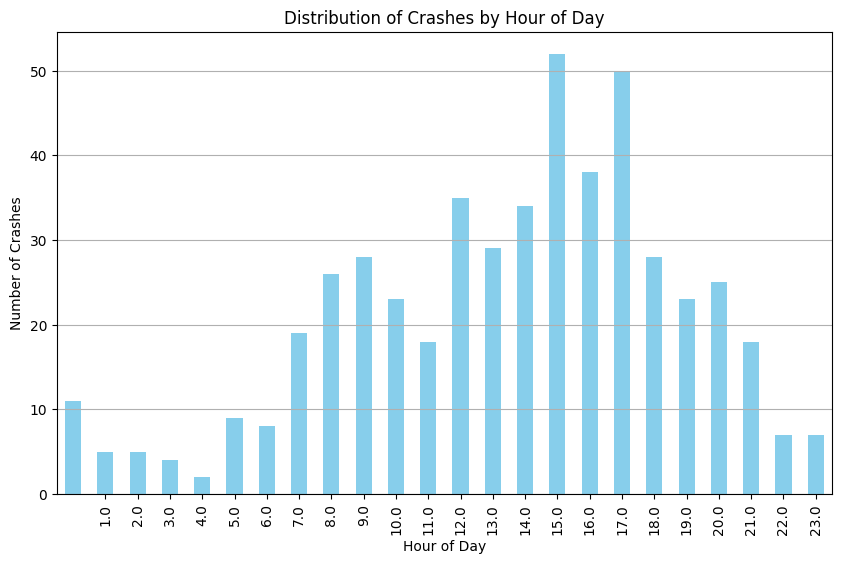

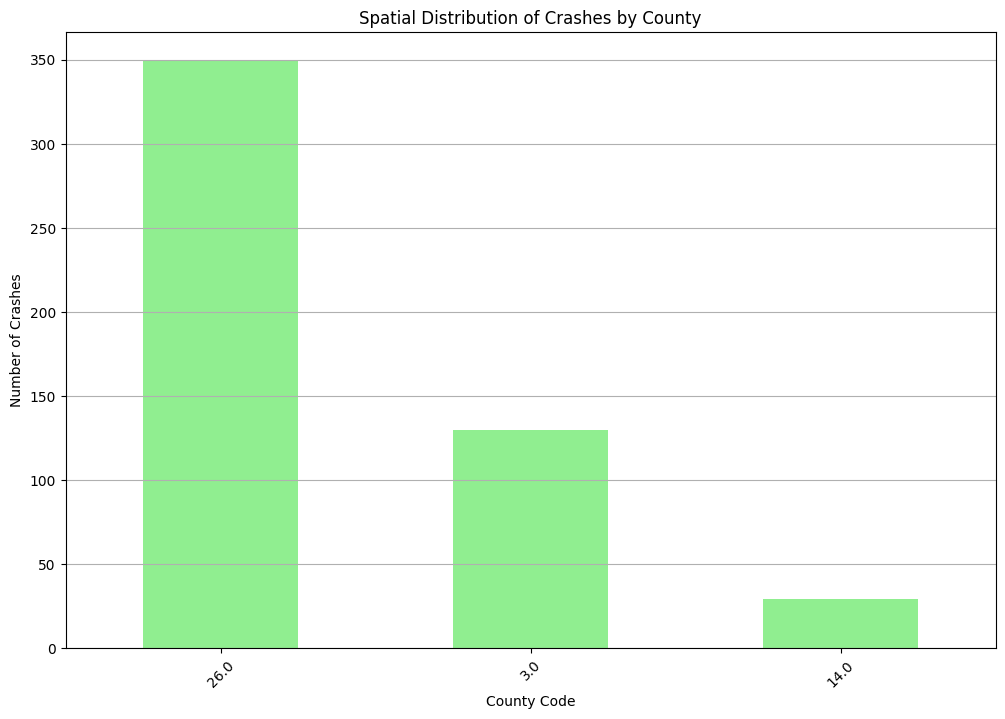

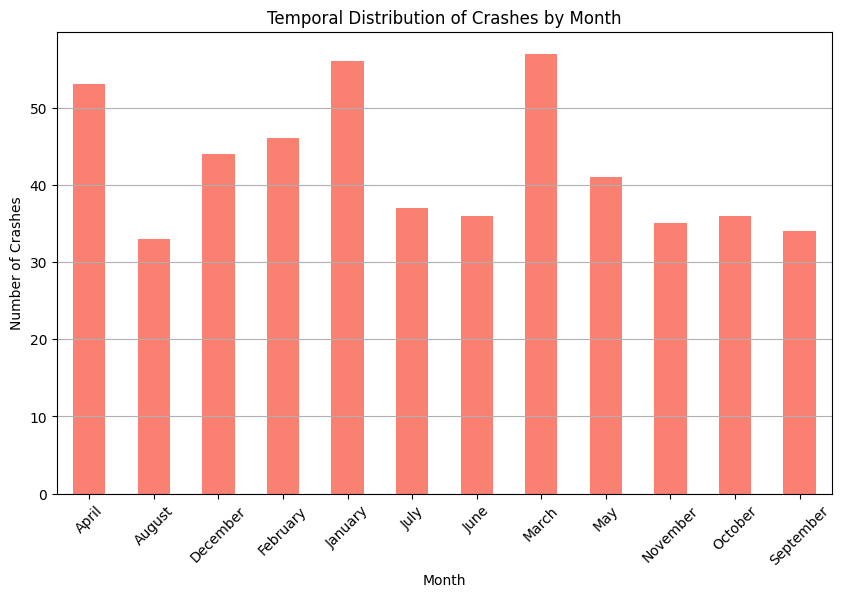

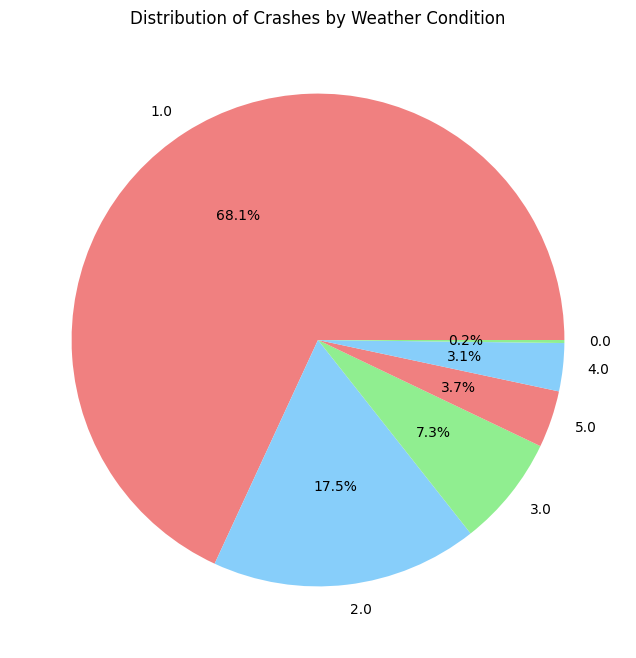

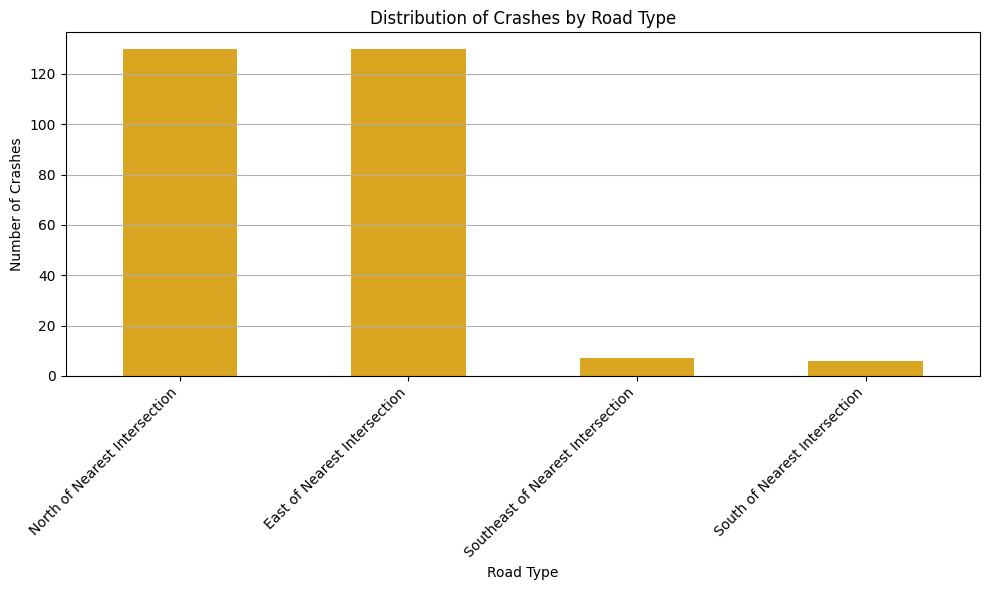

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file into a DataFrame
data = pd.read_csv("data.csv")

# Assertion 1: Distribution of Crashes by Hour of Day
hourly_crashes = data[data['Crash Hour'].between(0, 23)]['Crash Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
hourly_crashes.plot(kind='bar', color='skyblue')
plt.title('Distribution of Crashes by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes')
plt.xticks(range(1, 24))
plt.grid(axis='y')
plt.show()

# Assertion 2: Spatial Distribution of Crashes by County
county_crashes = data['County Code'].value_counts()
plt.figure(figsize=(12, 8))
county_crashes.plot(kind='bar', color='lightgreen')
plt.title('Spatial Distribution of Crashes by County')
plt.xlabel('County Code')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Assertion 3: Temporal Distribution of Crashes by Month
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
data['Month Name'] = data['Crash Month'].map(month_names)
monthly_crashes = data['Month Name'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
monthly_crashes.plot(kind='bar', color='salmon')
plt.title('Temporal Distribution of Crashes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Assertion 4: Distribution of Crashes by Weather Condition
weather_crashes = data['Weather Condition'].value_counts()
plt.figure(figsize=(8, 8))
weather_crashes.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Distribution of Crashes by Weather Condition')
plt.ylabel('')
plt.show()

# Assertion 5: Distribution of Crashes by Road Type
road_type_labels = {
    0: 'Non-Intersectional on State Highway System Outside City Limits',
    1: 'North of Nearest Intersection',
    2: 'Northeast of Nearest Intersection',
    3: 'East of Nearest Intersection',
    4: 'Southeast of Nearest Intersection',
    5: 'South of Nearest Intersection',
    6: 'Southwest of Nearest Intersection',
    7: 'West of Nearest Intersection',
    8: 'Northwest of Nearest Intersection',
    9: 'Center of the Intersection'
}

# Replace numeric road type codes with descriptive labels
data['Road Character'] = data['Road Character'].map(road_type_labels)

# Assertion: Distribution of Crashes by Road Type
roadtype_crashes = data['Road Character'].value_counts()
plt.figure(figsize=(10, 6))
roadtype_crashes.plot(kind='bar', color='goldenrod')
plt.title('Distribution of Crashes by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [56]:
import pandas as pd

# Read the data from the CSV file into a DataFrame
data = pd.read_csv("data.csv")

# Assertion: Median type must be in the range of 0 to 2 or blank
invalid_records = data[~data['Median Type'].isin(['0', '1', '2', ''])]

if not invalid_records.empty:
    print("Number of invalid records found:", len(invalid_records))
else:
    print("All records have a valid median type within the range of 0 to 2 or blank.")
# noticed there are many records with median type non numeric and more the 2 (checked in the document as the median type will be between 0 to 2)

Number of invalid records found: 1518


In [59]:
import pandas as pd

# Read the data from the CSV file into a DataFrame
data = pd.read_csv("data.csv")

# Assertion: Impact location code must be less than or equal to 14 or blank when longitude and latitude are provided
invalid_records = data[(data['Longitude Degrees'].notnull()) & (data['Latitude Degrees'].notnull()) &
                       ~(data['Impact Location'].isin(['', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']))]

if not invalid_records.empty:
    print("Number of invalid records found:", len(invalid_records))
else:
    print("All records with longitude and latitude have a valid impact location code.")

Number of invalid records found: 3
